In [1]:

import pandas as pd
import numpy as np

In [4]:
# First, import the class data
data = pd.read_excel("../../data/class.xlsx")
data

,Name,Height,Weight,Gender,Hair Length (cm),Like Programming [Y/N],VG/day [0-24],"Grade [1,6]"
0,CD,178.0,80.0,M,8,N,0,5.00
1,LI,156.0,NaN,F,40,Y&N,0,4.50
2,AA,163.0,50.0,F,45,Y,0,5.00
3,VD,168.0,54.0,F,23,Y,0,5.25
4,MP,157.0,56.0,F,25,Y,0,5.00
5,PM,183.0,76.0,M,0,Y,3,5.00
6,BS,172.0,70.0,M,4,N,1,5.00
7,KH,193.1,90.0,M,40,Y,3,4.50
8,TG,193.0,77.0,M,70,Y,6,5.00
9,TG,160.0,160.0,M,45,Y,2,4.50


In [5]:
# Try to predict weight from height
X = data["Height"]
Y = data["Weight"]
X.at[0] /= 10

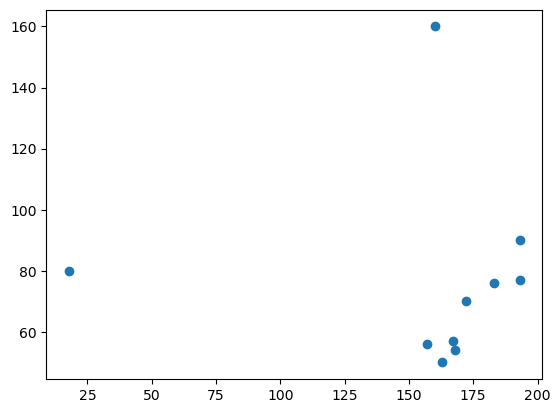

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)


In [7]:
# Calculate the mean-square loss over all examples
def mse_loss(f, X, Y):
    mse = 0
    for t in range(len(Y)):
        a = f.predict(X[t])
        mse += abs(a - Y[t])**2
        #print(X[t], Y[t], a)
    return mse / len(Y)


In [8]:
# We define linear functions as a class for simplicity of implem,entation
class LinearFunction:
    def __init__(self, n):
        self.params = np.zeros(n)
        self.n_in = n
    def predict(self, x):
        print(self.params, x)
        return np.dot(self.params, x)

# One-dimensional example

Here we just look at single parameter prediction functions

$$f_\beta(x) = \beta x,$$

with $x, \beta \in \mathbb{R}$. So there is only one input and one parameter. This allows us to visualise the MSE on the data for different values of $\beta$:

$$L(D, \beta) = \frac{1}{|D|}\sum_{(x,y) \in D} \ell(f_\beta(x), y),$$

with $\ell(a, y) = (a - y)^2$.



In [9]:
# Here we calculate the MSE of that function for different values of beta
a = 0
n_samples = 100
beta = 0.3+ 0.2*np.arange(0, n_samples)/n_samples # search for a range between 0 and 1
print(beta)
mse = np.zeros(n_samples)
for k in range(n_samples):
    fun = LinearFunction(1)
    fun.params[0] = beta[k]
    mse[k] = mse_loss(fun, X, Y)
    
beta_min = beta[np.argmin(mse)]
print(beta_min)

[0.3   0.302 0.304 0.306 0.308 0.31  0.312 0.314 0.316 0.318 0.32  0.322
 0.324 0.326 0.328 0.33  0.332 0.334 0.336 0.338 0.34  0.342 0.344 0.346
 0.348 0.35  0.352 0.354 0.356 0.358 0.36  0.362 0.364 0.366 0.368 0.37
 0.372 0.374 0.376 0.378 0.38  0.382 0.384 0.386 0.388 0.39  0.392 0.394
 0.396 0.398 0.4   0.402 0.404 0.406 0.408 0.41  0.412 0.414 0.416 0.418
 0.42  0.422 0.424 0.426 0.428 0.43  0.432 0.434 0.436 0.438 0.44  0.442
 0.444 0.446 0.448 0.45  0.452 0.454 0.456 0.458 0.46  0.462 0.464 0.466
 0.468 0.47  0.472 0.474 0.476 0.478 0.48  0.482 0.484 0.486 0.488 0.49
 0.492 0.494 0.496 0.498]
[0.3] 17.8
[0.3] 156.0
[0.3] 163.0
[0.3] 168.0
[0.3] 157.0
[0.3] 183.0
[0.3] 172.0
[0.3] 193.1
[0.3] 193.0
[0.3] 160.0
[0.3] 167.0
[0.302] 17.8
[0.302] 156.0
[0.302] 163.0
[0.302] 168.0
[0.302] 157.0
[0.302] 183.0
[0.302] 172.0
[0.302] 193.1
[0.302] 193.0
[0.302] 160.0
[0.302] 167.0
[0.304] 17.8
[0.304] 156.0
[0.304] 163.0
[0.304] 168.0
[0.304] 157.0
[0.304] 183.0
[0.304] 172.0
[0.304] 193

/tmp/ipykernel_14198/3980316634.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mse[k] = mse_loss(fun, X, Y)


Text(0.5, 1.0, 'MSE loss for $f_\\beta(x) = \\beta x$')

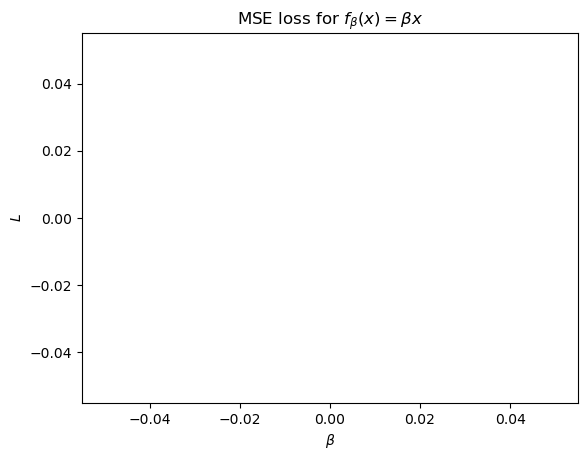

In [10]:
plt.plot(beta, mse)
plt.xlabel("$\\beta$")
plt.ylabel("$L$")
plt.title("MSE loss for $f_\\beta(x) = \\beta x$")

[0.3] 17.8
[0.3] 18.8
[0.3] 19.8
[0.3] 20.8
[0.3] 21.8
[0.3] 22.8
[0.3] 23.8
[0.3] 24.8
[0.3] 25.8
[0.3] 26.8
[0.3] 27.8
[0.3] 28.8
[0.3] 29.8
[0.3] 30.8
[0.3] 31.8
[0.3] 32.8
[0.3] 33.8
[0.3] 34.8
[0.3] 35.8
[0.3] 36.8
[0.3] 37.8
[0.3] 38.8
[0.3] 39.8
[0.3] 40.8
[0.3] 41.8
[0.3] 42.8
[0.3] 43.8
[0.3] 44.8
[0.3] 45.8
[0.3] 46.8
[0.3] 47.8
[0.3] 48.8
[0.3] 49.8
[0.3] 50.8
[0.3] 51.8
[0.3] 52.8
[0.3] 53.8
[0.3] 54.8
[0.3] 55.8
[0.3] 56.8
[0.3] 57.8
[0.3] 58.8
[0.3] 59.8
[0.3] 60.8
[0.3] 61.8
[0.3] 62.8
[0.3] 63.8
[0.3] 64.8
[0.3] 65.8
[0.3] 66.8
[0.3] 67.8
[0.3] 68.8
[0.3] 69.8
[0.3] 70.8
[0.3] 71.8
[0.3] 72.8
[0.3] 73.8
[0.3] 74.8
[0.3] 75.8
[0.3] 76.8
[0.3] 77.8
[0.3] 78.8
[0.3] 79.8
[0.3] 80.8
[0.3] 81.8
[0.3] 82.8
[0.3] 83.8
[0.3] 84.8
[0.3] 85.8
[0.3] 86.8
[0.3] 87.8
[0.3] 88.8
[0.3] 89.8
[0.3] 90.8
[0.3] 91.8
[0.3] 92.8
[0.3] 93.8
[0.3] 94.8
[0.3] 95.8
[0.3] 96.8
[0.3] 97.8
[0.3] 98.8
[0.3] 99.8
[0.3] 100.8
[0.3] 101.8
[0.3] 102.8
[0.3] 103.8
[0.3] 104.8
[0.3] 105.8
[0.3] 106.8
[0.

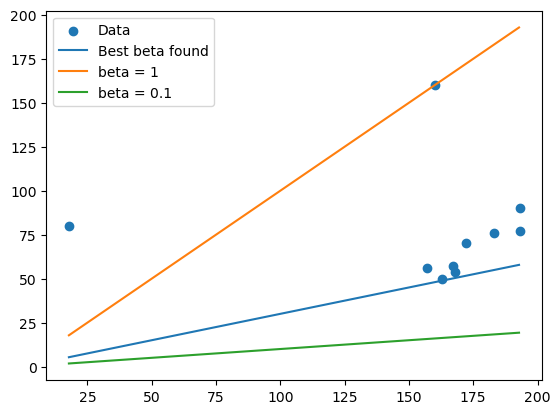

In [11]:
plt.scatter(X, Y)
x_range = np.arange(min(X), max(X))
fun = LinearFunction(1)
fun.params[0] = beta_min
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
print("Best beta value:", beta_min)
fun.params[0] = 1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
fun.params[0] = 0.1
y_range = [fun.predict(x) for x in x_range]
plt.plot(x_range, y_range)
plt.legend(["Data", "Best beta found", "beta = 1", "beta = 0.1"])

# One-dimensional example

Here we just look at single parameter prediction functions

$$f_\beta(x) = \beta + 0 x,$$

with $x, \beta \in \mathbb{R}$. So there is only one input and one parameter. This allows us to visualise the MSE on the data for different values of $\beta$:

$$L(D, \beta) = \frac{1}{|D|}\sum_{(x,y) \in D} \ell(f_\beta(x), y),$$

with $\ell(a, y) = (a - y)^2$.



In [12]:
import statsmodels.api as sm
Xa = sm.add_constant(np.array(X))
Xa

array([[  1. ,  17.8],
       [  1. , 156. ],
       [  1. , 163. ],
       [  1. , 168. ],
       [  1. , 157. ],
       [  1. , 183. ],
       [  1. , 172. ],
       [  1. , 193.1],
       [  1. , 193. ],
       [  1. , 160. ],
       [  1. , 167. ]])

In [13]:
a = 0
n_samples = 100
beta = 0.3+ 0.2*np.arange(0, n_samples)/n_samples # search for a range between 0 and 1
print(beta)
mse = np.zeros(n_samples)
for k in range(n_samples):
    fun = LinearFunction(2)
    fun.params[0] = beta[k]
    fun.params[1] = 0
    mse[k] = mse_loss(fun, Xa, Y)
    
beta_min = beta[np.argmin(mse)]
print(beta_min)

[0.3   0.302 0.304 0.306 0.308 0.31  0.312 0.314 0.316 0.318 0.32  0.322
 0.324 0.326 0.328 0.33  0.332 0.334 0.336 0.338 0.34  0.342 0.344 0.346
 0.348 0.35  0.352 0.354 0.356 0.358 0.36  0.362 0.364 0.366 0.368 0.37
 0.372 0.374 0.376 0.378 0.38  0.382 0.384 0.386 0.388 0.39  0.392 0.394
 0.396 0.398 0.4   0.402 0.404 0.406 0.408 0.41  0.412 0.414 0.416 0.418
 0.42  0.422 0.424 0.426 0.428 0.43  0.432 0.434 0.436 0.438 0.44  0.442
 0.444 0.446 0.448 0.45  0.452 0.454 0.456 0.458 0.46  0.462 0.464 0.466
 0.468 0.47  0.472 0.474 0.476 0.478 0.48  0.482 0.484 0.486 0.488 0.49
 0.492 0.494 0.496 0.498]
[0.3 0. ] [ 1.  17.8]
[0.3 0. ] [  1. 156.]
[0.3 0. ] [  1. 163.]
[0.3 0. ] [  1. 168.]
[0.3 0. ] [  1. 157.]
[0.3 0. ] [  1. 183.]
[0.3 0. ] [  1. 172.]
[0.3 0. ] [  1.  193.1]
[0.3 0. ] [  1. 193.]
[0.3 0. ] [  1. 160.]
[0.3 0. ] [  1. 167.]
[0.302 0.   ] [ 1.  17.8]
[0.302 0.   ] [  1. 156.]
[0.302 0.   ] [  1. 163.]
[0.302 0.   ] [  1. 168.]
[0.302 0.   ] [  1. 157.]
[0.302 0.   ] [  1

[0.3 0. ] 17.8
[0.3 0. ] 18.8
[0.3 0. ] 19.8
[0.3 0. ] 20.8
[0.3 0. ] 21.8
[0.3 0. ] 22.8
[0.3 0. ] 23.8
[0.3 0. ] 24.8
[0.3 0. ] 25.8
[0.3 0. ] 26.8
[0.3 0. ] 27.8
[0.3 0. ] 28.8
[0.3 0. ] 29.8
[0.3 0. ] 30.8
[0.3 0. ] 31.8
[0.3 0. ] 32.8
[0.3 0. ] 33.8
[0.3 0. ] 34.8
[0.3 0. ] 35.8
[0.3 0. ] 36.8
[0.3 0. ] 37.8
[0.3 0. ] 38.8
[0.3 0. ] 39.8
[0.3 0. ] 40.8
[0.3 0. ] 41.8
[0.3 0. ] 42.8
[0.3 0. ] 43.8
[0.3 0. ] 44.8
[0.3 0. ] 45.8
[0.3 0. ] 46.8
[0.3 0. ] 47.8
[0.3 0. ] 48.8
[0.3 0. ] 49.8
[0.3 0. ] 50.8
[0.3 0. ] 51.8
[0.3 0. ] 52.8
[0.3 0. ] 53.8
[0.3 0. ] 54.8
[0.3 0. ] 55.8
[0.3 0. ] 56.8
[0.3 0. ] 57.8
[0.3 0. ] 58.8
[0.3 0. ] 59.8
[0.3 0. ] 60.8
[0.3 0. ] 61.8
[0.3 0. ] 62.8
[0.3 0. ] 63.8
[0.3 0. ] 64.8
[0.3 0. ] 65.8
[0.3 0. ] 66.8
[0.3 0. ] 67.8
[0.3 0. ] 68.8
[0.3 0. ] 69.8
[0.3 0. ] 70.8
[0.3 0. ] 71.8
[0.3 0. ] 72.8
[0.3 0. ] 73.8
[0.3 0. ] 74.8
[0.3 0. ] 75.8
[0.3 0. ] 76.8
[0.3 0. ] 77.8
[0.3 0. ] 78.8
[0.3 0. ] 79.8
[0.3 0. ] 80.8
[0.3 0. ] 81.8
[0.3 0. ] 82.8
[0.3 0. ] 

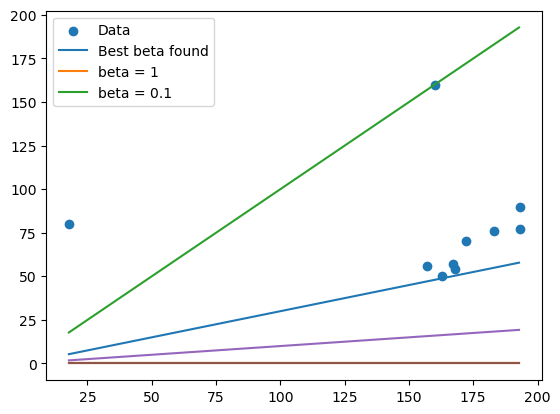

In [14]:
plt.clf()
plt.scatter(X, Y)
x_range = np.arange(min(X), max(X))
fun = LinearFunction(2)
fun.params[0] = beta_min
fun.params[1] = 0
y_range = [fun.predict(sm.add_constant(np.array(x))) for x in x_range]
plt.plot(x_range, y_range)
print("Best beta value:", beta_min)
fun.params[0] = 1
y_range = [fun.predict(sm.add_constant(x)) for x in x_range]
plt.plot(x_range, y_range)
fun.params[0] = 0.1
y_range = [fun.predict(sm.add_constant(x)) for x in x_range]
plt.plot(x_range, y_range)
plt.legend(["Data", "Best beta found", "beta = 1", "beta = 0.1"])